# FCNN 이용하여 MNIST 분류

- 컴퓨터 비전: 컴퓨터를 통해 디지털 영상을 획득, 처리, 분석하여 높은 수준의 이해를 얻는 것

### 학습 목차
1. Import modules
2. 데이터 불러오기: Keras Dataset MNIST 활용
3. FCNN 모델 구성
4. 모델 Compile: model.compile
5. 학습 수행: model.fit, EarlyStopping, ModelCheckpoint
6. 학습 결과 테스트: model.evaluate
7. 성능 그래프
8. 테스트

### 1. Import

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. 데이터 불러오기

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # pixel 값 -> 0~1사이로

In [12]:
# 3차원 배열
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### 3. FCNN 모델 구성
- FCNN 입력 구조: 2차원: Batch * row
- 이미지 입력 데이터를 일렬로 쭉 펴서 모델에 주어야 하므로 Flatten 함수를 사용

In [16]:
# Dense layer: Classic fully connected layer: every input neuron connects to every output neuron
# Dense layer(units): How many output features the layer will produce
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10, activation='softmax')])

/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4. 모델 컴파일

In [19]:
# model.compile(): Configures how the neural-network model will learn
# It attaches three main components: an optimizer, a loss function, and optional evalutation metrics
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 5. 학습 수행

In [22]:
EPOCHS = 50
BATCH_SIZE = 1024

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
# verbose = 0: the callback stays completely silent
# verbose = 1: It prints a message whenever training ends early because the monitored metric stopped improving
es = EarlyStopping(monitor = 'val_loss', patience = 4, verbose = 1)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', save_best_only=True, verbose =1)

In [28]:
history = model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, callbacks = [es, mc], validation_data = (x_test, y_test))

Epoch 1/50
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5420 - loss: 1.4837   
Epoch 1: val_accuracy improved from -inf to 0.90410, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5924 - loss: 1.3387 - val_accuracy: 0.9041 - val_loss: 0.3577
Epoch 2/50
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.3812 
Epoch 2: val_accuracy improved from 0.90410 to 0.92350, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8940 - loss: 0.3759 - val_accuracy: 0.9235 - val_loss: 0.2693
Epoch 3/50
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.2924
Epoch 3: val_accuracy improved from 0.92350 to 0.93700, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9184 - loss: 0.2905 - val_accuracy: 0.9370 - val_loss: 0.2256
Epoch 4/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9275 - loss: 0.2588 
Epoch 4: val_accuracy improved from 0.93700 to 0.94480, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.2547 - val_accuracy: 0.9448 - val_loss: 0.1945
Epoch 5/50
40/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9412 - loss: 0.2127 
Epoch 5: val_accuracy improved from 0.94480 to 0.95040, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9410 - loss: 0.2121 - val_accuracy: 0.9504 - val_loss: 0.1721
Epoch 6/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.2013 
Epoch 6: val_accuracy improved from 0.95040 to 0.95440, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9433 - loss: 0.1992 - val_accuracy: 0.9544 - val_loss: 0.1579
Epoch 7/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1791 
Epoch 7: val_accuracy improved from 0.95440 to 0.95730, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9492 - loss: 0.1779 - val_accuracy: 0.9573 - val_loss: 0.1452
Epoch 8/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9529 - loss: 0.1654 
Epoch 8: val_accuracy improved from 0.95730 to 0.96010, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1642 - val_accuracy: 0.9601 - val_loss: 0.1354
Epoch 9/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9574 - loss: 0.1520 
Epoch 9: val_accuracy improved from 0.96010 to 0.96320, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9575 - loss: 0.1512 - val_accuracy: 0.9632 - val_loss: 0.1282
Epoch 10/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1380 
Epoch 10: val_accuracy improved from 0.96320 to 0.96530, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - loss: 0.1384 - val_accuracy: 0.9653 - val_loss: 0.1204
Epoch 11/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9640 - loss: 0.1288 
Epoch 11: val_accuracy improved from 0.96530 to 0.96680, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9635 - loss: 0.1294 - val_accuracy: 0.9668 - val_loss: 0.1146
Epoch 12/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1207 
Epoch 12: val_accuracy improved from 0.96680 to 0.96820, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9648 - loss: 0.1210 - val_accuracy: 0.9682 - val_loss: 0.1086
Epoch 13/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1191 
Epoch 13: val_accuracy improved from 0.96820 to 0.96880, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9660 - loss: 0.1183 - val_accuracy: 0.9688 - val_loss: 0.1050
Epoch 14/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9671 - loss: 0.1128 
Epoch 14: val_accuracy improved from 0.96880 to 0.97100, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9675 - loss: 0.1119 - val_accuracy: 0.9710 - val_loss: 0.1000
Epoch 15/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1016 
Epoch 15: val_accuracy did not improve from 0.97100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.1016 - val_accuracy: 0.9708 - val_loss: 0.0971
Epoch 16/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9738 - loss: 0.0945 
Epoch 16: val_accuracy improved from 0.97100 to 0.97290, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0950 - val_accuracy: 0.9729 - val_loss: 0.0941
Epoch 17/50
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9726 - loss: 0.0950 
Epoch 17: val_accuracy did not improve from 0.97290
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9726 - loss: 0.0943 - val_accuracy: 0.9725 - val_loss: 0.0927
Epoch 18/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9744 - loss: 0.0891 
Epoch 18: val_accuracy improved from 0.97290 to 0.97370, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.0891 - val_accuracy: 0.9737 - val_loss: 0.0886
Epoch 19/50
40/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0826 
Epoch 19: val_accuracy did not improve from 0.97370
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.0833 - val_accuracy: 0.9735 - val_loss: 0.0867
Epoch 20/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9760 - loss: 0.0811 
Epoch 20: val_accuracy improved from 0.97370 to 0.97490, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0810 - val_accuracy: 0.9749 - val_loss: 0.0830
Epoch 21/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0776 
Epoch 21: val_accuracy improved from 0.97490 to 0.97520, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.0774 - val_accuracy: 0.9752 - val_loss: 0.0825
Epoch 22/50
38/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9789 - loss: 0.0719 
Epoch 22: val_accuracy improved from 0.97520 to 0.97660, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0730 - val_accuracy: 0.9766 - val_loss: 0.0808
Epoch 23/50
39/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0698 
Epoch 23: val_accuracy did not improve from 0.97660
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0699 - val_accuracy: 0.9762 - val_loss: 0.0800
Epoch 24/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9791 - loss: 0.0710 
Epoch 24: val_accuracy improved from 0.97660 to 0.97700, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0703 - val_accuracy: 0.9770 - val_loss: 0.0779
Epoch 25/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0661 
Epoch 25: val_accuracy did not improve from 0.97700
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0659 - val_accuracy: 0.9769 - val_loss: 0.0779
Epoch 26/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0651 
Epoch 26: val_accuracy did not improve from 0.97700
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0646 - val_accuracy: 0.9769 - val_loss: 0.0765
Epoch 27/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9825 - loss: 0.0592
Epoch 27: val_accuracy did not improve from 0.97700
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9825 - loss: 0.0596 - val_accuracy: 0.9762 - val_loss: 0.0770
Epoch 28/50
45/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0576 
Epoch 28: val_accuracy improved from 0.97

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0579 - val_accuracy: 0.9782 - val_loss: 0.0747
Epoch 29/50
41/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0532 
Epoch 29: val_accuracy improved from 0.97820 to 0.97840, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0540 - val_accuracy: 0.9784 - val_loss: 0.0720
Epoch 30/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0532 
Epoch 30: val_accuracy improved from 0.97840 to 0.97850, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0533 - val_accuracy: 0.9785 - val_loss: 0.0724
Epoch 31/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.0509 
Epoch 31: val_accuracy improved from 0.97850 to 0.97870, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0514 - val_accuracy: 0.9787 - val_loss: 0.0717
Epoch 32/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0498 
Epoch 32: val_accuracy did not improve from 0.97870
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0503 - val_accuracy: 0.9785 - val_loss: 0.0709
Epoch 33/50
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0482 
Epoch 33: val_accuracy did not improve from 0.97870
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9851 - loss: 0.0481 - val_accuracy: 0.9784 - val_loss: 0.0712
Epoch 34/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0453
Epoch 34: val_accuracy improved from 0.97870 to 0.97920, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0456 - val_accuracy: 0.9792 - val_loss: 0.0693
Epoch 35/50
44/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0440 
Epoch 35: val_accuracy did not improve from 0.97920
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0443 - val_accuracy: 0.9774 - val_loss: 0.0699
Epoch 36/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0449
Epoch 36: val_accuracy did not improve from 0.97920
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9784 - val_loss: 0.0704
Epoch 37/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0431 
Epoch 37: val_accuracy improved from 0.97920 to 0.98000, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0432 - val_accuracy: 0.9800 - val_loss: 0.0686
Epoch 38/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9871 - loss: 0.0431 
Epoch 38: val_accuracy did not improve from 0.98000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9794 - val_loss: 0.0682
Epoch 39/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0400
Epoch 39: val_accuracy did not improve from 0.98000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0402 - val_accuracy: 0.9791 - val_loss: 0.0697
Epoch 40/50
43/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0378 
Epoch 40: val_accuracy did not improve from 0.98000
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0380 - val_accuracy: 0.9796 - val_loss: 0.0678
Epoch 41/50
41/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0393 
Epoch 41: val_accuracy did not improve fr

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0323 - val_accuracy: 0.9801 - val_loss: 0.0666
Epoch 48/50
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0316 
Epoch 48: val_accuracy did not improve from 0.98010
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0316 - val_accuracy: 0.9800 - val_loss: 0.0654
Epoch 49/50
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0296 
Epoch 49: val_accuracy improved from 0.98010 to 0.98130, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0297 - val_accuracy: 0.9813 - val_loss: 0.0655
Epoch 50/50
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9917 - loss: 0.0280 
Epoch 50: val_accuracy did not improve from 0.98130
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0283 - val_accuracy: 0.9804 - val_loss: 0.0654


### 6. 학습 결과 테스트

In [34]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9786 - loss: 0.0762


[0.06537248939275742, 0.980400025844574]

### 7. 성능 그래프

In [41]:
x_range = range(1, len(history.history['accuracy'])+1)

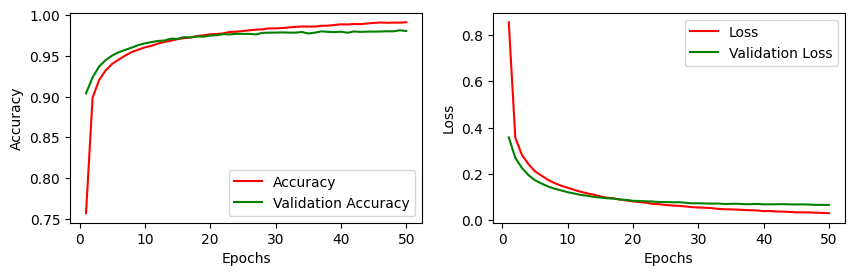

In [43]:
plt.figure(figsize = (10, 6)) # Creates a new blank figure canvas that is 10 inches wide and 6 inches tall
plt.subplot(221) # Creates a 2 x 2 grid of subplots and activates the first slot (row 1, column 1)
plt.plot(x_range, history.history['accuracy'], color = 'red', label = 'Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color = 'green', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() # Displays a legend box so the red and green lines can be identified by their labels
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = 'Loss')
plt.plot(x_range, history.history['val_loss'], color = 'green', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 8. 테스트

In [47]:
x_test[0].shape

(28, 28)

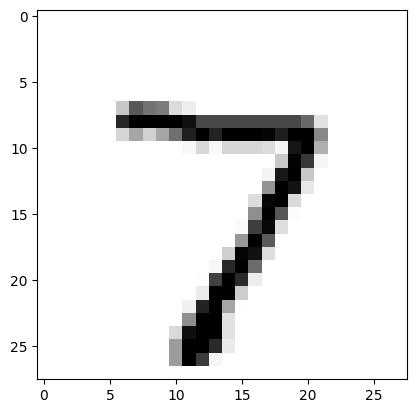

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction Probability:  [[1.2561997e-06 3.0105564e-08 3.9804891e-06 2.0037348e-04 7.8890067e-10
  2.9453989e-07 4.8421884e-13 9.9975199e-01 3.8425941e-07 4.1864754e-05]]
The Answer is  [7]


In [53]:
n = 0
plt.imshow(x_test[n], cmap='Greys')
plt.show()

# That images is originally a 28 x 28 array,
# But Keras expect a batch dimension, so you add one with .reshape(1, 28, 28)
pred = model.predict(x_test[n].reshape(1, 28, 28))
answer = np.argmax(pred, axis = -1)
# np.argmax: Finds the index of the maximum value along the specified axis
# axis 0: row direction
# axis 1: column direction

print("Prediction Probability: ", pred)
print("The Answer is ", answer)